## Visualizacion de Datos

In [2]:
#import sys
#!{sys.executable} -m pip install watermark


In [3]:
%load_ext watermark
%watermark

Last updated: 2022-01-17T18:21:49.792328-05:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 5.4.0-48-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [4]:
import pandas as pd


In [5]:
url = 'https://raw.githubusercontent.com/manugarri/curso_data_science/master/Secciones/Seccion4.Analisis_y_procesado_de_datos/Visualizaci%C3%B3n%20de%20datos%20en%20Python/boston_dataset.csv'
df = pd.read_csv(url)
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

### Scatter Plot / grafico de dispercion

Se utiliza para representar relacion entre 2 variables.

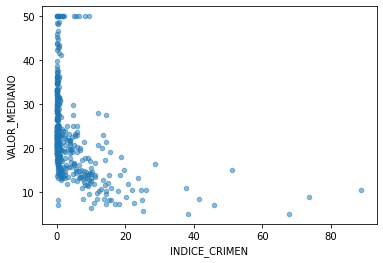

In [9]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO", alpha=0.5)
plt.show()

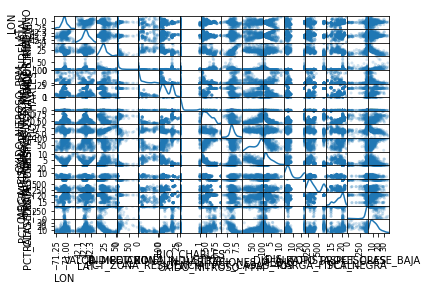

In [10]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df,alpha=0.2,diagonal="kde")

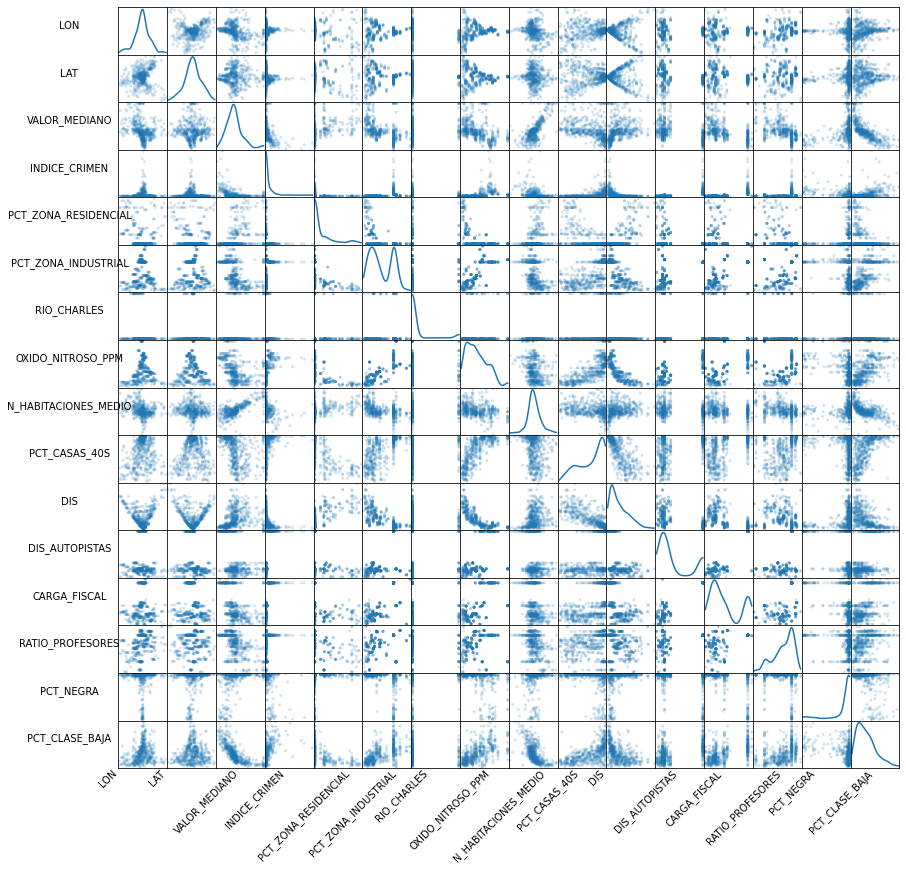

In [11]:
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

<AxesSubplot:ylabel='Density'>

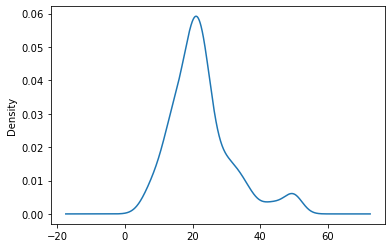

In [14]:
df.VALOR_MEDIANO.plot(kind="kde")

## Histogramas
se usan para representar la distribucion de una variable, esto es, que rango de valores tiene, cuales son los valores más comunes

<AxesSubplot:ylabel='Frequency'>

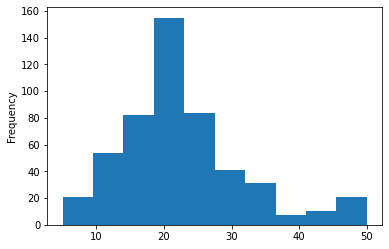

In [16]:
df.VALOR_MEDIANO.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

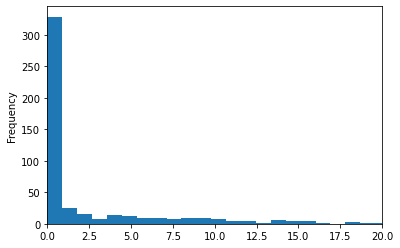

In [25]:
#df.INDICE_CRIMEN.plot(kind="hist", bins = 100)
df.INDICE_CRIMEN.plot(kind="hist",  xlim=(0,20),bins = 100)

## Gráfico de barras/columnas
Los gráficos de barras se utilizan comúnmente para representar y comparar una variable entre distintos grupos

In [26]:
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [27]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()

In [28]:
valor_por_ciudad.head()

CIUDAD
Arlington    25.2
Ashland      21.4
Bedford      30.1
Belmont      36.2
Beverly      20.8
Name: VALOR_MEDIANO, dtype: float64

<AxesSubplot:xlabel='CIUDAD'>

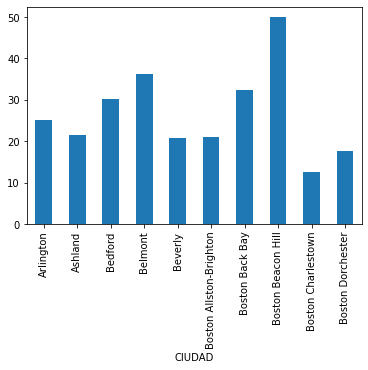

In [29]:
valor_por_ciudad.head(10).plot(kind="bar")

<AxesSubplot:ylabel='CIUDAD'>

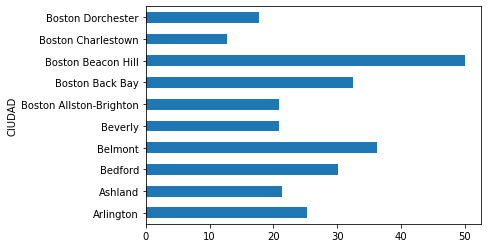

In [30]:
valor_por_ciudad.head(10).plot(kind="barh")

## Gráfico de linea
Los gráficos de linea se usan principalmente para representar tendencias, esto es, se usan para variables que varian con el tiempo

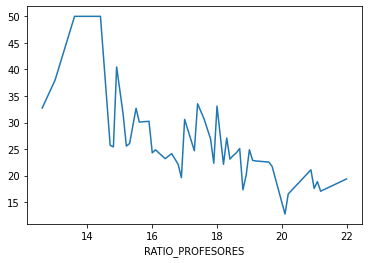

In [31]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot();

## Gráfico circular
se utilizan principalmente para ver la relacion de como se compone una variable respecto a otra.

<AxesSubplot:ylabel='RIO_CHARLES'>

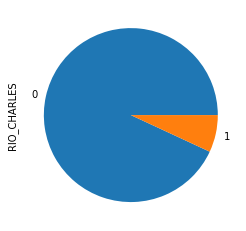

In [32]:
df.RIO_CHARLES.value_counts().plot(kind="pie")

## Diagrama de caja (Box Plot)
Los diagramas de caja son útiles a la hora de representar grupos de datos y comparar entre ellos. Otra ventaja de los boxplots es que identifican de forma sencilla si una variable tiene muchos outliers, esto es, elementos que se alejan de los valores frecuentes de dicha variable.

In [33]:
df["VALOR_CUANTILES"] = pd.qcut(df.VALOR_MEDIANO, 5)

<AxesSubplot:title={'center':'INDICE_CRIMEN'}, xlabel='VALOR_CUANTILES'>

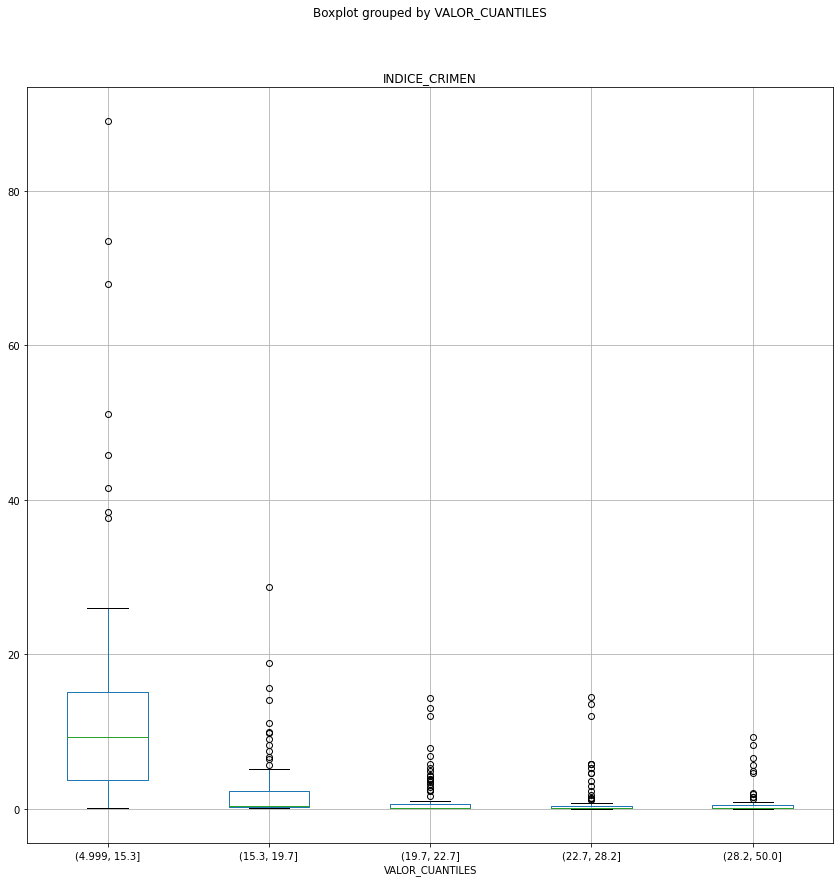

In [34]:
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES", figsize=(14,14))